In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

dfrs = (pd.read_csv("Dataframes/resultados_regresionSimbolica_it7000f.csv"))
dfrsc = pd.read_csv("Dataframes/resultados_regresionSimbolicaC_it7000f.csv")
dfrscimc = pd.read_csv("Dataframes/resultados_regresionSimbolicaCIMC_it7000f.csv")
dfrsimc = pd.read_csv("Dataframes/resultados_regresionSimbolicaIMC_it7000f.csv")
listaregresion = []
listaregresion.append(dfrs)
listaregresion.append(dfrsc)
listaregresion.append(dfrscimc)
listaregresion.append(dfrsimc)

In [3]:
def pintarRegresion(df, titulo):
    batch_sizes = [4, 8, 12, 16, 32, 64, 128, 256]
    horas = [1,3,5,7,10,12,14,18,21]


    # Etiquetas y estilos
    labels = ["1 hora", "3 hora", "5 hora", "7 hora", "10 horas", "12 horas", "14 horas", "18 horas", "21 horas"]
    estilos = ['-'] * 9
    colores = sns.color_palette("husl", 9)            

    # Crear la figura
    plt.figure(figsize=(11, 7))
    plt.title(titulo)

    sns.lineplot(data=df, x="iteracion", y="valor")

    plt.xlabel("Batch Size")
    plt.ylabel("Valor")
    plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\raulg\AppData\Local\Temp\ipykernel_19108\2127618548.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


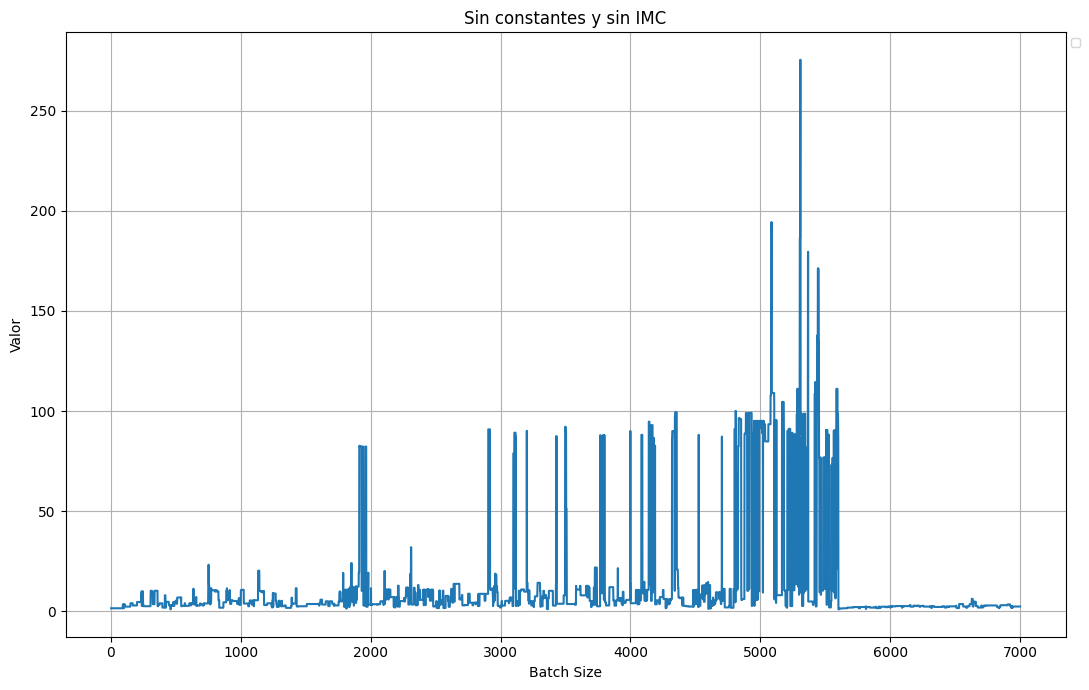

In [4]:
pintarRegresion(dfrs, "Sin constantes y sin IMC")

C:\Users\raulg\AppData\Local\Temp\ipykernel_19108\2127618548.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


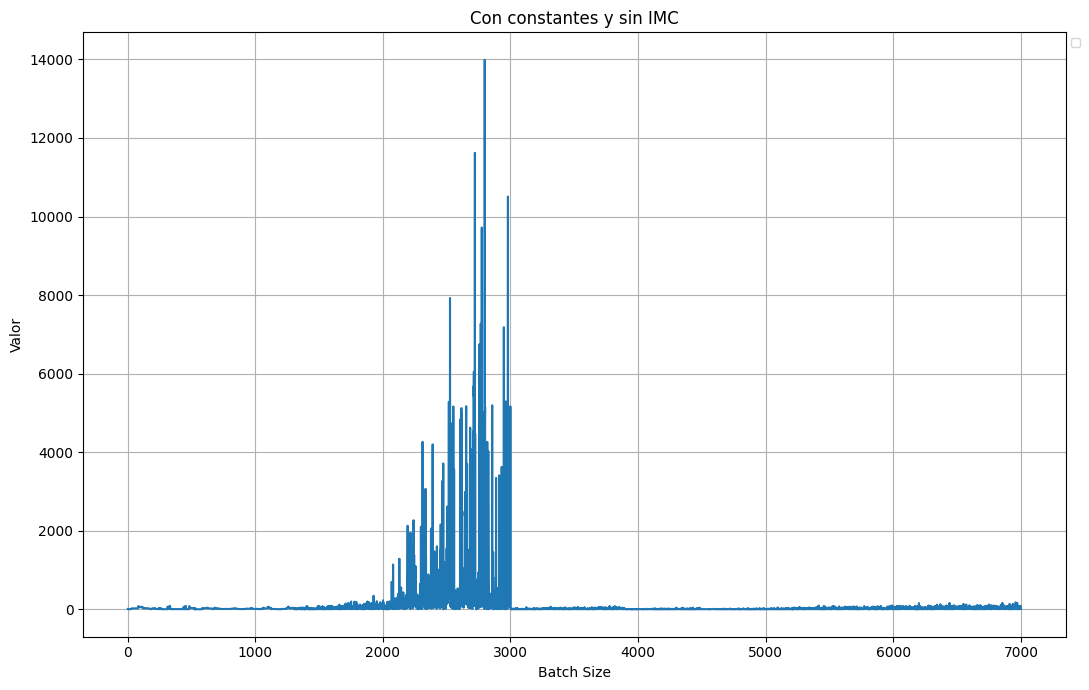

In [5]:
pintarRegresion(dfrsc, "Con constantes y sin IMC")

C:\Users\raulg\AppData\Local\Temp\ipykernel_19108\2127618548.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


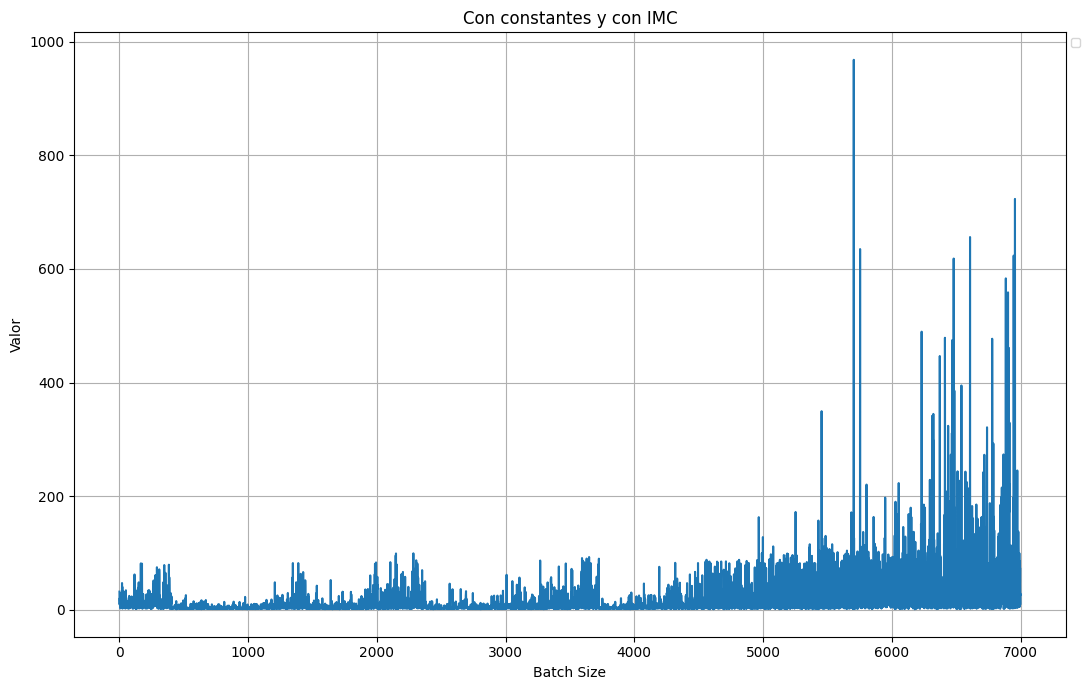

In [6]:
pintarRegresion(dfrscimc, "Con constantes y con IMC")

C:\Users\raulg\AppData\Local\Temp\ipykernel_19108\2127618548.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


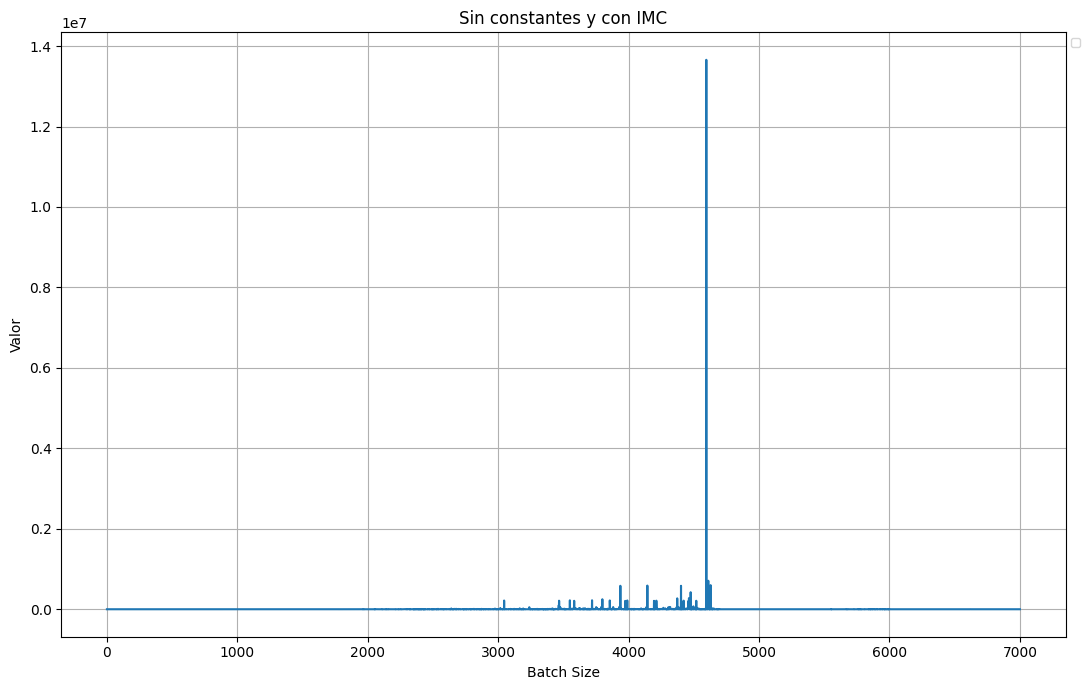

In [7]:
pintarRegresion(dfrsimc, "Sin constantes y con IMC")

In [8]:
df_filtrado = dfrsimc[dfrsimc['valor'] <= 1000]

In [9]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5756 entries, 0 to 6999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iteracion  5756 non-null   int64  
 1   valor      5756 non-null   float64
 2   gen        5756 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 179.9+ KB


C:\Users\raulg\AppData\Local\Temp\ipykernel_19108\2127618548.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))


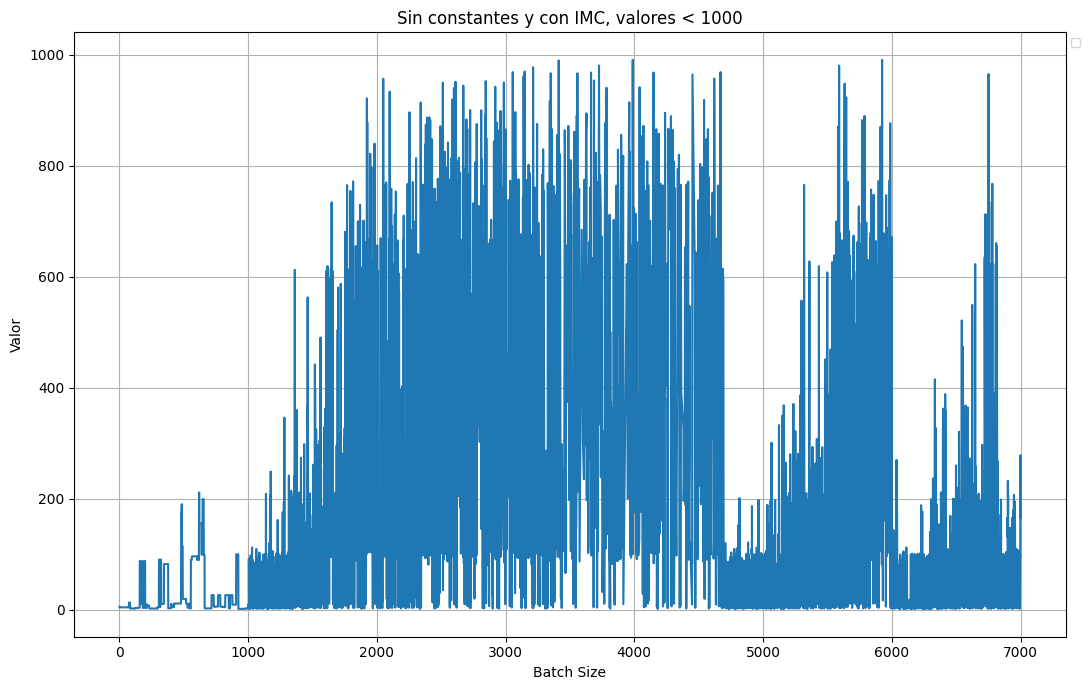

In [10]:
pintarRegresion(df_filtrado, "Sin constantes y con IMC, valores < 1000" )

In [11]:
nombres_df = {  # Creo etiquetas descriptivas para cada dataFrame
    0: 'Sin IMC y sin constantes',
    1: 'Sin IMC y con constantes',
    2: 'Con IMC y con constantes',
    3: 'Con IMC y sin constantes',
}

for i, df in enumerate(listaregresion): # Añad0 el índice del dataFrame a cada fila
    df['dataframe_idx'] = i
todos_df = pd.concat(listaregresion, ignore_index=True)    # Combino los dataframes
todos_df = todos_df.drop_duplicates(subset='valor') # Elimino dupicados
top_10 = todos_df.sort_values(by='valor').head(10)  # Ordeno los valores y obtengo las diez mejores filas
top_10['dataframe_nombre'] = top_10['dataframe_idx'].map(nombres_df) # Creo una nueva columna que asocia índice con nombre
top_10 = top_10.drop(columns='dataframe_idx')   # Elimino la columna del índice
print("Top 10 mejores valores únicos:")
print(top_10)


Top 10 mejores valores únicos:
       iteracion     valor                                                gen  \
16807       2808  1.016758                                   p33 * p23 / p23    
457          458  1.016758                               10 - 10 + 27 * 5 / 5   
16013       2014  1.017357  p33 - p28 * p26 / p9 / c2.8692055465965627 / p...   
13196       6197  1.019015  c0.021105481531102366 / c3.601355288897536 / c...   
17296       3297  1.020025  p33 + p0 / p27 / p24 / c4.21720433656655 / p19...   
18614       4615  1.024363                                    p33 - p8 + p10    
15655       1656  1.024885  c0.2959980396548151 / c2.3227683737431364 / p1...   
17968       3969  1.025888  p33 + p5 * c0.008715229372029953 * c0.06342175...   
15710       1711  1.026408              p33 - c0.3768334312098537 / p3 / p19    
10109       3110  1.034252  p27 - c3.5847793623100923 + c3.911723678933262...   

               dataframe_nombre  
16807  Con IMC y con constantes  
457    Si